# Чтение, обработка и общий анализ

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

url = 'https://docs.google.com/spreadsheets/d/1jG7ijOkGuopO-D1lWi_9GgrlgMQ6X2Ais7D63b_yxCY/export?format=csv'


df = pd.read_csv(url)
df['event_date'] = pd.to_datetime(df['event_date'])
# df.head(10)
# df.info()
# df.columns

missing_percent = df.isnull().sum()
missing_percent
# пропущенных значений нет



duplicates_sum = df.duplicated().sum()
duplicates_sum
# ищем дубликаты

duplicates = df.duplicated()
duplicate_rows = df[duplicates]
duplicate_rows
# этот способ подходит если есть дубликаты и мы хотим на них посмотреть

Посещаемость по группам:
   group_ids  is_attend
0          1   0.735294
1          2   0.854839
2          3   0.871429
3          5   0.833333


# Посещаемость по группам

In [21]:
group_attendence = df.groupby('group_ids')['is_attend'].mean().reset_index()
# здесь мы сделали группировку по идентификатору группы и подсчитали среднее количество пропусков, заодно отбросили индексы, что полезно при перестановках и изменениях DataFrame дял корректного отображения колонок
print(f'Посещаемость по группам:')
print(group_attendence)

Посещаемость по группам:
   group_ids  is_attend
0          1   0.735294
1          2   0.854839
2          3   0.871429
3          5   0.833333


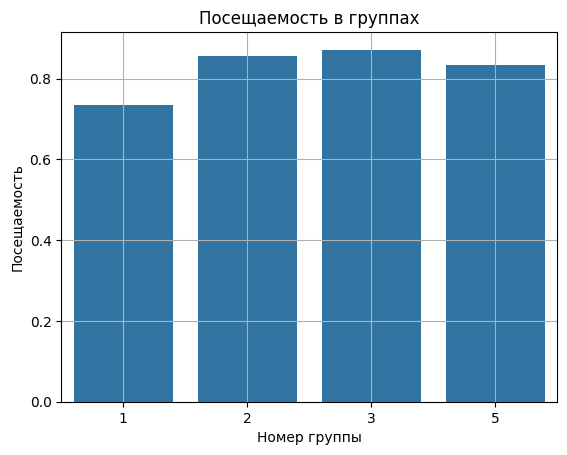

In [3]:
import seaborn as sns

sns.barplot(x='group_ids', y='is_attend', data = group_attendence)
plt.xlabel('Номер группы')
plt.ylabel('Посещаемость')
plt.title('Посещаемость в группах')
plt.grid(True)
plt.show()

# Посещаемость в зависимости от преподавателя

In [4]:
teacher_attendence = df.groupby('teacher_ids')['is_attend'].mean().reset_index()
print(teacher_attendence)

   teacher_ids  is_attend
0            3   0.735294
1            4   0.833333
2            5   0.871429
3            6   0.882353
4            7   0.727273


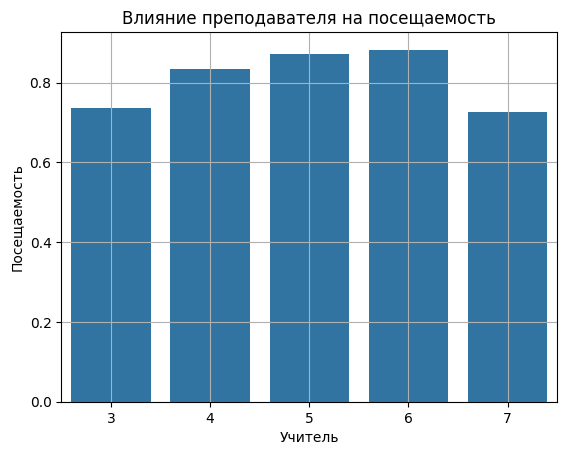

In [5]:
sns.barplot(x='teacher_ids', y='is_attend', data = teacher_attendence)
plt.xlabel('Учитель')
plt.ylabel('Посещаемость')
plt.title('Влияние преподавателя на посещаемость')
plt.grid(True)
plt.show()

# Пропускающие уроки

In [11]:
customers_attendence = df.groupby('customer_id')['is_attend'].mean().reset_index()
have_attendence = customers_attendence.loc[customers_attendence['is_attend'] < 0.85]

print(f'Список учащихся пропускающих уроки:')
print(have_attendence.sort_values(by='is_attend'))


Список учащихся пропускающих уроки:
    customer_id  is_attend
4            36   0.000000
40          580   0.250000
45          595   0.333333
50          725   0.333333
46          597   0.333333
22          258   0.500000
39          578   0.500000
48          681   0.500000
21          249   0.571429
42          587   0.600000
20          247   0.615385
32          383   0.666667
23          260   0.666667
1            14   0.666667
3            30   0.666667
14          145   0.666667
44          593   0.666667
31          379   0.700000
17          192   0.785714
16          183   0.833333
27          335   0.833333
8            49   0.833333
13          137   0.833333


# Нагрузка на учителей

In [20]:
# df.columns
load_of_teacher = df.groupby('teacher_ids')['event_id'].sum().reset_index()
print(load_of_teacher)

# Index(['event_id', 'event_date', 'customer_id', 'is_attend', 'group_ids',
#        'teacher_ids', 'attendance_id', 'day_of_week'],
#       dtype='object')

   teacher_ids  event_id
0            3      2142
1            4      4655
2            5      2401
3            6      1434
4            7       564


# Посещаемость по дням недели

In [22]:
df['event_date'] = pd.to_datetime(df['event_date'])

df['day_of_week'] = df['event_date'].dt.day_name()
# создаем колонку с днями недели для каждой даты в 'event_date'

date_attendence = df.groupby('day_of_week')['is_attend'].mean().reset_index()
print(f'Посещаемость по дням недели:')
print(date_attendence)

Посещаемость по дням недели:
  day_of_week  is_attend
0      Friday   0.793103
1      Monday   0.777778
2    Saturday   0.777778
3    Thursday   0.854839
4     Tuesday   0.860465
5   Wednesday   0.836957


# Количество уроков по дням недели

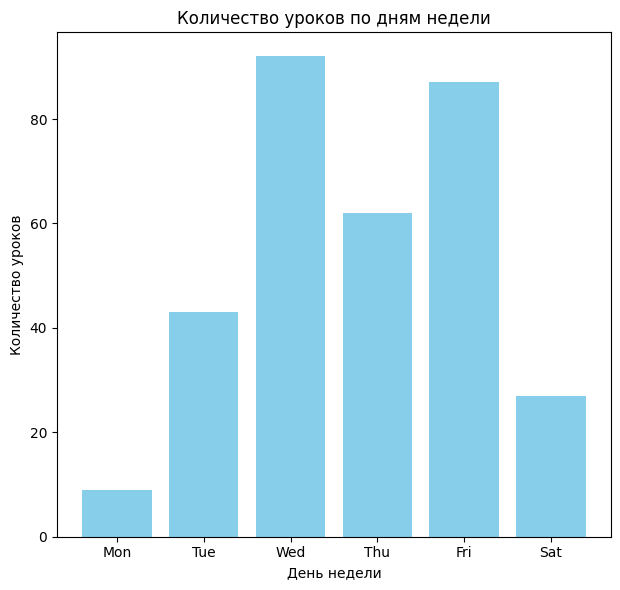

In [28]:
df['event_date'] = pd.to_datetime(df['event_date'])
df['day_of_week'] = df['event_date'].dt.strftime('%a')

days_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

# Группируем данные по дням недели
analysis = df.groupby('day_of_week', observed=True).agg(
    total_events=('event_id', 'count'),  # Общее количество уроков
    total_attendance=('is_attend', 'sum'),  # Общая посещаемость
    unique_customers=('customer_id', 'nunique')  # Уникальные ученики
).reindex(days_order).reset_index()

plt.figure(figsize=(12, 6))

# График общего количества уроков
plt.subplot(1, 2, 1)
plt.bar(analysis['day_of_week'], analysis['total_events'], color='skyblue')
plt.title('Количество уроков по дням недели')
plt.xlabel('День недели')
plt.ylabel('Количество уроков')

# Настройки отображения
plt.tight_layout()
plt.show()

# Посещаемость по дням недели

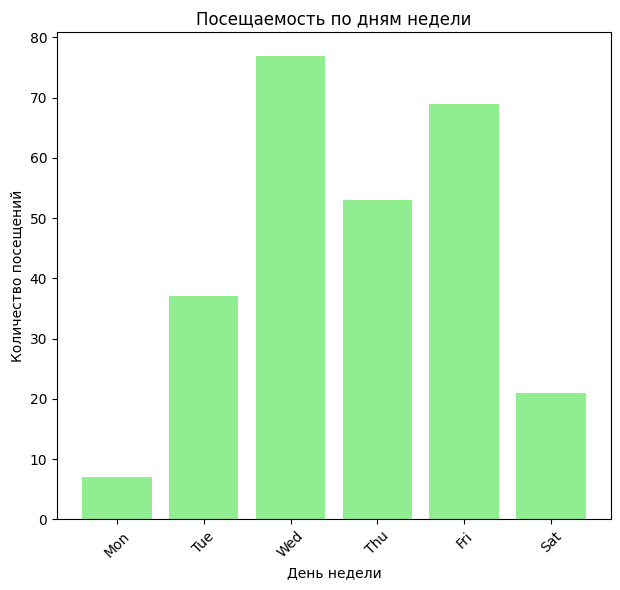

In [27]:
plt.figure(figsize=(12, 6))

# График посещаемости
plt.subplot(1, 2, 2)
plt.bar(analysis['day_of_week'], analysis['total_attendance'], color='lightgreen')
plt.title('Посещаемость по дням недели')
plt.xlabel('День недели')
plt.ylabel('Количество посещений')
plt.xticks(rotation=45)

# Настройки отображения
plt.tight_layout()
plt.show()

# Средняя посещаемость по дням недели

<Figure size 1200x600 with 0 Axes>

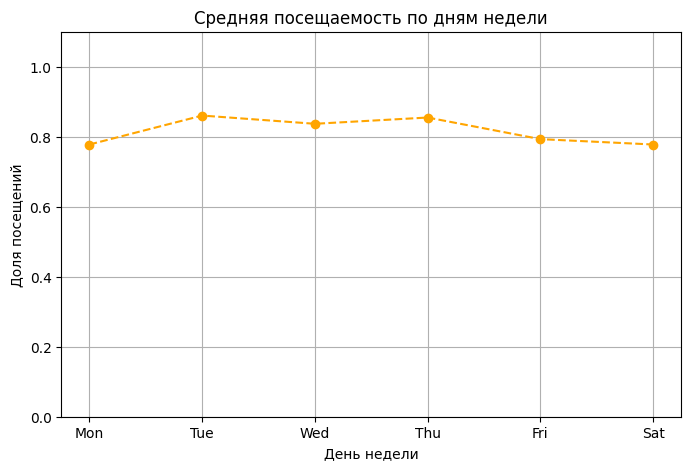

<Figure size 640x480 with 0 Axes>

In [29]:
plt.figure(figsize=(12, 6))

# Дополнительный анализ: средняя посещаемость
analysis['attendance_rate'] = analysis['total_attendance'] / analysis['total_events']

# График средней посещаемости
plt.figure(figsize=(8, 5))
plt.plot(analysis['day_of_week'], analysis['attendance_rate'], 
         marker='o', linestyle='--', color='orange')
plt.title('Средняя посещаемость по дням недели')
plt.xlabel('День недели')
plt.ylabel('Доля посещений')
plt.ylim(0, 1.1)
plt.grid(True)
plt.show()

# Настройки отображения
plt.tight_layout()
plt.show()